<a href="https://colab.research.google.com/github/Model-training/Model_dataset/blob/main/urbanagricultureAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io


df = pd.read_csv('/content/crop_dataset.csv',parse_dates=True)
df
df.loc[:,"N"]

0        90
1        85
2        60
3        74
4        78
       ... 
2095    190
2096    188
2097    154
2098    183
2099    194
Name: N, Length: 2100, dtype: int64

In [ ]:
X = df.iloc[:, :7]
y= df.iloc[:, [7]]
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.969047619047619


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


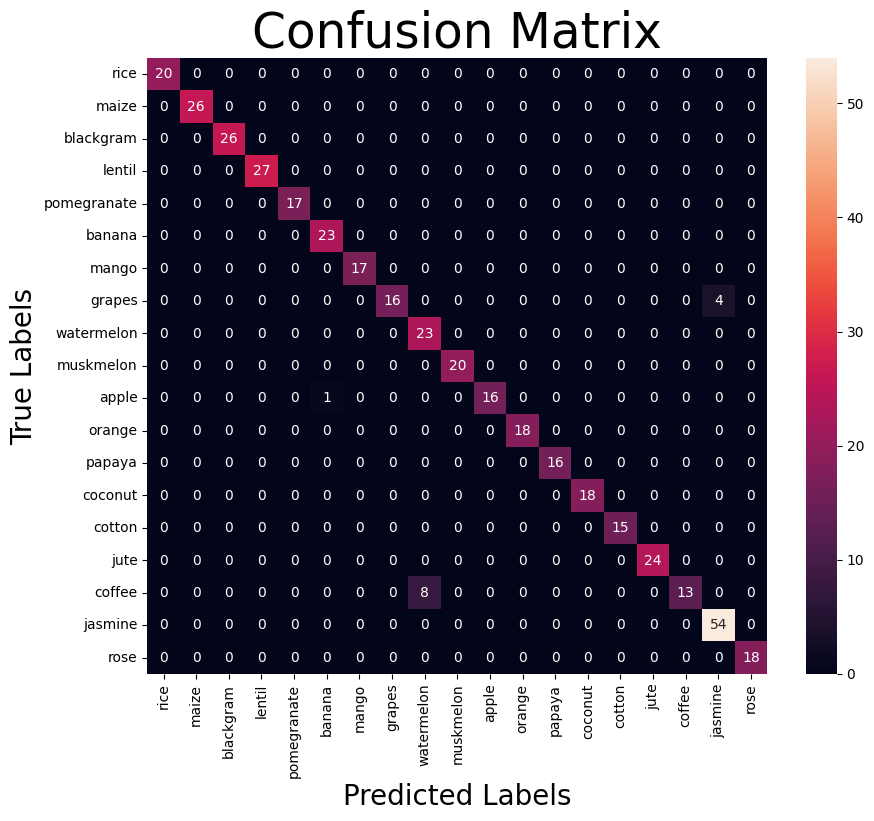

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
import string

classes = ['rice','maize','blackgram','lentil','pomegranate','banana','mango','grapes',
'watermelon','muskmelon','apple','orange','papaya','coconut','cotton','jute','coffee','jasmine',
'rose']


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels', fontsize=20)
plt.ylabel('True Labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=35)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc=accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='macro')
precision = precision_score(y_test, y_pred,average='macro')
f1_score = f1_score(y_test, y_pred,average='macro')

print("Accuracy   %.4f"%(acc*100),"%")
print("RECALL     %.4f"%(recall*100),"%")
print("Precision  %.4f"%(precision*100),"%")
print("F1-Score   %.4f"%(f1_score*100),"%")

Accuracy   96.9048 %
RECALL     96.6328 %
Precision  98.0595 %
F1-Score   96.9376 %


In [ ]:
import pandas as pd
import io


df = pd.read_csv('/content/Book1.csv',parse_dates=True)
n=int(df.loc[:,"N"])
print(n)
p=df.loc[:,"P"]
k=df.loc[:,"K"]
tem=df.loc[:,"temperature"]
hum=df.loc[:,"humidity"]
ph=df.loc[:,"ph"]
rf=df.loc[:,"rainfall"]
p=[n,p,k,tem,hum,ph,rf]
l=[]
for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=i*5)
  knn.fit(X_train, y_train)
  y_pred = knn.predict([p])
  if y_pred not in l:
    l.append(y_pred)

FileNotFoundError: ignored

In [ ]:
!pip install geocoder


In [ ]:
import geocoder

# Get the current location based on public IP address
location = geocoder.ip('me')

if location:
    latitude = location.latlng[0]
    longitude = location.latlng[1]
    print(f'Latitude: {latitude}')
    print(f'Longitude: {longitude}')
else:
    print('Failed to retrieve location data.')



Latitude: 36.175
Longitude: -115.1372


In [ ]:
!pip install requests


In [ ]:
import requests

# Specify the latitude and longitude coordinates for the location of interest
latitude = 36.175  # Replace with the desired latitude
longitude = -115.1372  # Replace with the desired longitude

# CRU API URL for rainfall data (annual sum)
url = f'https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.05/2010_2019/pre/{latitude}_{longitude}.dat'

# Send the API request
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # The response contains annual rainfall data in text format
    rainfall_data = response.text
    print(f'Annual Rainfall Data for Latitude {latitude}, Longitude {longitude}:\n{rainfall_data}')
else:
    print('Failed to retrieve data.')



Failed to retrieve data.


In [ ]:
import pandas as pd
import io
import numpy as np
df = pd.read_csv('/content/crop_dataset.csv',parse_dates=True)
X = df.iloc[:, :7]
y= df.iloc[:, [7]]
X = X.to_numpy()
y = y.to_numpy()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
df1 = pd.read_csv('/content/DHT11SENSOR.csv',parse_dates=True)
n=int(df1.loc[:,"N"])
p=int(df1.loc[:,"P"])
k=int(df1.loc[:,"K"])
tem=float(df1.loc[:,"temp"])
hum=float(df1.loc[:,"hum"])
ph=float(df1.loc[:,"ph"])
rf=float(df1.loc[:,"rf"])
p=[n,p,k,tem,hum,ph,rf]
l=[]
for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=i*5)
  knn.fit(X_train, y_train)
  y_pred = knn.predict([p])
  if y_pred not in l:
    l.append(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Accuracy: 0.969047619047619


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
n=float(input("Nitrogen content in PPM:"))
p=float(input("Phosphorus content in PPM:"))
k=float(input("Potassium content in PPM:"))
tem=float(input("Temperatue in °C:"))
hum=float(input("Humidity in %:"))
ph=float(input("PH value:"))
rf=float(input("Annual Rainfall in cm:"))
p=[n,p,k,tem,hum,ph,rf]
l=[]
for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=i*5)
  knn.fit(X_train, y_train)
  y_pred = knn.predict([p])
  if y_pred not in l:
    l.append(y_pred)

Nitrogen content in PPM:2
Phosphorus content in PPM:24
Potassium content in PPM:38
Temperatue in °C:24.55
Humidity in %:91.63
PH value:5.92
Annual Rainfall in cm:111.96


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
for i in l:
  print(*i)

jute
coffee
